In [1]:
import seaborn.apionly as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
iris = sns.load_dataset("iris")
iris.head()

c:\python38\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


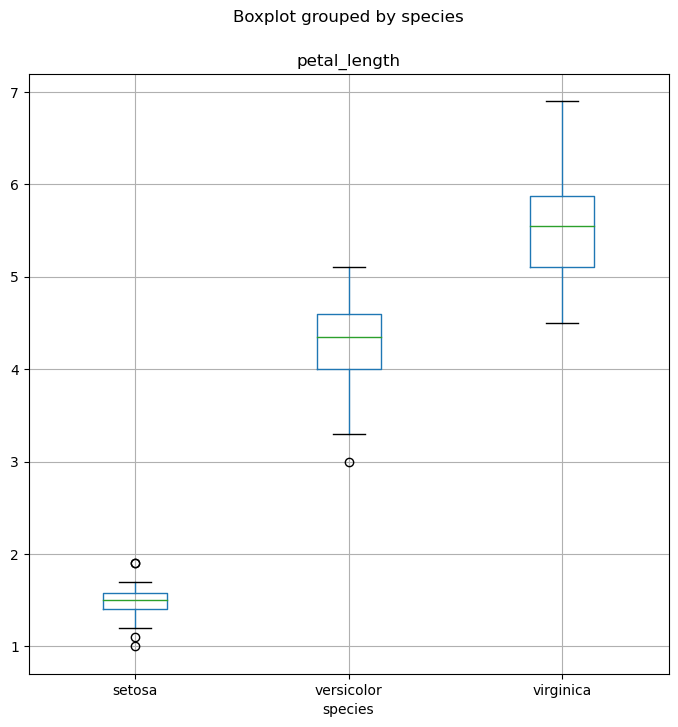

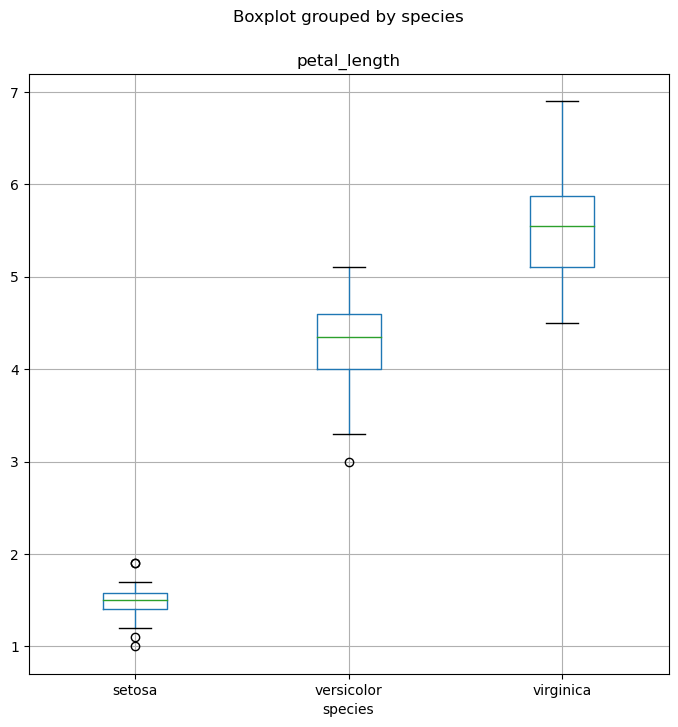

In [3]:
iris.boxplot(column="petal_length",
            by="species",
            figsize=(8,8))
plt.show()

In [17]:
grps = pd.unique(iris.species.values)

In [18]:
from scipy.stats import shapiro 

for name in grps:
    print(name, shapiro(iris["sepal_width"][iris["species"]==name]))
    

setosa ShapiroResult(statistic=0.97171950340271, pvalue=0.27152615785598755)
versicolor ShapiroResult(statistic=0.9741332530975342, pvalue=0.33799493312835693)
virginica ShapiroResult(statistic=0.9673905372619629, pvalue=0.18089592456817627)


In [24]:
from scipy.stats import bartlett

bartlett(iris["sepal_width"][iris["species"]=="setosa"],
          iris["sepal_width"][iris["species"]=="versicolor"],
           iris["sepal_width"][iris["species"]=="virginica"])

BartlettResult(statistic=2.0910752014392338, pvalue=0.35150280041580323)

In [6]:
# Bartlett’in testi, tüm girdi örneklerinin eşit varyanslara sahip popülasyonlardan geldiğine dair sıfır hipotezini test eder. 
# Önemli ölçüde normal olmayan popülasyonlardan örnekler için Levene’nin test seviyesi daha sağlamdır.

In [4]:
# varyansları eşit mi diye test ediliyor.
# sonuç olarak varyanslar birbirine eşittir diyoruz. p-value > 0,05

from scipy.stats import levene

levene(iris["sepal_width"][iris["species"]=="setosa"],
          iris["sepal_width"][iris["species"]=="versicolor"],
           iris["sepal_width"][iris["species"]=="virginica"])

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

In [5]:
# p-value < 0,05 reject to H0
# sepal_width değişkenine göre çiçek türleri farklılığı anlamlıdır. yani sepal_width tür konusunda belirleyicidir diyebiliriz.
# 3 türün ortalamaları farklıdır.( daha doğrusu en az 1'i 3'ü diyebilmek için tek tek birbirleri ile karşılaştırmak gerekir.)
# türümü belirlememde etkili bir değişken 

from scipy.stats import f_oneway

f_oneway(iris["sepal_width"][iris["species"]=="setosa"],
          iris["sepal_width"][iris["species"]=="versicolor"],
           iris["sepal_width"][iris["species"]=="virginica"])

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)